# APPLE MOBILITY TRENDS ACROSS THE WORLD (Jan to Apr) - COVID 19 impact on Mobility



## ABSTRACT:


The COVID-19 pandemic is considered as the most crucial global health calamity of the century and the greatest challenge that the humankind faced since the 2nd World War. In December 2019, a new infectious respiratory disease emerged in Wuhan, Hubei province, China and was named by the World Health Organization as COVID-19 (coronavirus disease 2019). A new class of corona virus, known as SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2) has been found to be responsible for occurrence of this disease. As far as the history of human civilization is concerned there are instances of severe outbreaks of diseases caused by a number of viruses. According to the report of the World Health Organization (WHO as of April 18 2020), the current outbreak of COVID-19, has affected over 2164111 people and killed more than 146,198 people in more than 200 countries throughout the world. Till now there is no report of any clinically approved antiviral drugs or vaccines that are effective against COVID-19.

It has rapidly spread around the world, posing enormous health, economic, environmental and social challenges to the entire human population. The coronavirus outbreak is severely disrupting the global economy. Almost all the nations are struggling to slow down the transmission of the disease by testing & treating patients, quarantining suspected persons through contact tracing, restricting large gatherings, maintaining complete or partial lock down etc. This paper describes the impact of COVID-19 on society and global environment, and the possible ways in which the disease can be controlled has also been discussed therein.

COVID 19 cases began surfacing around January, and increasing every day. This dataset can be used to study impacts on mobility in this COVID 19 period 

Due to COVID 19 spreading all across the world, there have been strict measures taken by the Governments of various Countries. Due to this people's mobility has also reduced across regions.
The given dataset is an Apple provided mobility report (across transportation types such as `walking`, `driving`, `transit`.

    How the mobility of people carrying the Apple mobile phones has changes, provides us an opportunity to study the mobility behaviors across the regions.
    
In this notebook, we shall do some EDA on this data to understand how the nations/regions followed some strict lockdown measures imposed by the governement, and how was the distribution of decreased mobility across different transport types. We will plot the population mobility (population using Apple product) to understand whether lockdown restrictions were abided by people of those regions.

Further Work:
This dataset can be further used for making judgments in taking decisions or actions, as to which region is more vulnerable to become a hotspot (If the mobility of a city/ region is increasing suddenly, that would mean that the chances of COVID 19 spreading would increase, and government would require to take best measures to control this mobility).

Limitation: The dataset comes from Apple's product mobility, and hence the inferences would represent only fraction of the people who use Apple products. This becomes even more limiting in making inferences for regions, where Apple products do not have enough reach - this will result in very less data from that region.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
apple = pd.read_csv('applemobility.csv')
apple.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64,31.43
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52,38.08
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,51.75,53.17,55.01,59.24,33.19,36.00,26.95,31.72,53.14,55.91


One can observe the transporation type taken into consideration countrywise.

In [3]:
apple.shape

(395, 96)

The above dataset contains data about relative volume of Direction Requests from differen region in Apple Maps. The Data of Jan 13 2020 has been fixed as 100 and for the succeding dates it is the relative volume as compared with Jan 13th data.

In [4]:
#Break into countires/regions and cities
geo_mask = apple['geo_type'] == "country/region"
mobility_countries = apple[geo_mask]
mobility_cities = apple[~geo_mask]
print("There are a total of {} countires and {} cities with provided mobility data.".format(len(mobility_countries),
                                                                                           len(mobility_cities)))

There are a total of 153 countires and 242 cities with provided mobility data.


In [5]:
def get_trans_count(df):
    name = df["geo_type"].iloc[0]
    return df["transportation_type"].value_counts().rename(str(name))
transport_types_count = pd.concat([get_trans_count(mobility_countries), get_trans_count(mobility_cities)], axis=1)
print("Here we can find mobility count in respective country and the city\n")
print(transport_types_count)


Here we can find mobility count in respective country and the city

         country/region  city
driving              63    89
walking              63    89
transit              27    64


In [6]:
apple.describe()   #statistical description of the data

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
count,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,100.0,102.051367,104.575949,107.315089,118.304886,116.855418,96.516025,102.030506,104.140861,105.272911,...,36.495747,39.549519,40.279013,40.748127,39.436152,39.566937,36.836304,32.842278,37.042734,39.554329
std,0.0,4.074084,6.255253,7.713471,13.879839,22.067678,14.519740,9.793529,9.770959,9.003694,...,21.245849,20.336866,20.280418,20.655334,19.994238,21.398051,19.191664,17.313402,17.746450,18.393675
min,100.0,90.140000,73.720000,74.530000,83.960000,69.280000,43.790000,72.900000,69.790000,78.250000,...,3.780000,5.450000,5.800000,5.780000,5.480000,4.460000,4.910000,4.130000,4.470000,6.530000
25%,100.0,99.860000,101.205000,102.705000,108.080000,100.310000,86.675000,97.340000,99.070000,99.900000,...,19.370000,23.420000,23.840000,23.400000,22.575000,22.455000,20.960000,18.410000,22.395000,23.550000
50%,100.0,101.780000,104.190000,106.870000,117.780000,114.840000,97.880000,101.210000,102.930000,104.320000,...,33.360000,37.300000,38.130000,38.930000,36.880000,35.990000,34.530000,31.690000,36.540000,38.910000
75%,100.0,104.045000,107.030000,110.265000,127.260000,129.935000,105.955000,104.810000,107.625000,109.030000,...,47.640000,52.660000,53.520000,55.315000,52.910000,51.985000,49.595000,43.520000,47.865000,52.235000
max,100.0,115.040000,138.000000,139.900000,173.980000,184.300000,157.280000,179.090000,159.860000,150.620000,...,108.250000,103.300000,101.080000,102.940000,104.480000,126.380000,103.790000,87.950000,94.740000,92.090000


In [7]:
print(apple.geo_type.unique())
print(apple.transportation_type.unique())

['country/region' 'city']
['driving' 'walking' 'transit']


In [8]:
# drop country/ region as it is not needed in the analysis

apple = apple.drop(['geo_type'], axis = 1)

In [9]:
print(apple.region.nunique())
regions = list(apple.region.unique())
print(regions)

152
['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK', 'United States', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Vietnam', 'Amsterdam', 'Athens', 'Atlanta', 'Auckland', 'Baltimore', 'Bangkok', 'Barcelona', 'Berlin', 'Birmingham - UK', 'Bochum - Dortmund', 'Boston', 'Brisbane', 'Brussels', 'Buenos Aires', 'Cairo', 'Calgary', 'Cape Town', 'Chicago', 'Cologne', 'Copenhagen'

Visualization Objectives:

-Visualize mobility of people in different countries over time (1/13/2020 to 04/14/2020)

-Mobility can be visualized for the Transportantion_types

In [10]:
apple_total_mob_per_day = apple.groupby(['region']).sum().reset_index()
apple_total_mob_per_day.head()

,region,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
0,Albania,200,195.98,200.36,195.66,204.40,212.80,186.96,190.04,191.85,...,46.46,57.53,51.83,56.24,55.66,53.61,53.10,54.48,68.16,69.51
1,Amsterdam,300,302.08,305.87,316.03,371.64,405.75,327.67,302.16,312.82,...,75.43,78.72,84.27,89.65,91.45,94.55,84.59,66.81,69.77,77.98
2,Argentina,200,192.18,203.82,223.88,235.17,238.15,179.98,196.50,201.54,...,20.65,29.09,32.04,35.46,34.45,30.38,35.15,23.34,37.45,38.95
3,Athens,200,200.20,202.58,213.19,235.32,237.09,190.43,187.43,192.26,...,34.53,46.45,46.89,55.38,58.33,64.85,63.77,64.79,68.02,70.61
4,Atlanta,300,308.82,318.46,326.05,355.01,339.10,261.15,282.91,290.49,...,121.86,153.26,149.76,154.83,162.29,173.56,163.83,100.36,160.84,167.65


In [11]:
print("Now we have taken total mobility into consideration, as shown in above data accoding to the religion")

Now we have taken total mobility into consideration, as shown in above data accoding to the religion


In [12]:
# defining a function for plotting the cumulative mobility across all transport types for a given region/country

def plot_mobility_total(region_country):
    apple_total_mob_per_day_region = apple_total_mob_per_day[apple_total_mob_per_day.region == region_country]
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.drop(['region'], axis = 1)
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.T
    apple_total_mob_per_day_region.columns = ['Cumulative Mobility across all transport']
    apple_total_mob_per_day_region.plot.line()
    
    
    
# defining function to take region name input from the user.

def input_region():
    print('\nWhich region/country mobility report would you like to see?')
    region_name = input()
    if(region_name in regions):
        print('\nBelow plotted is the mobility report for the region/country: ', region_name)
        plot_mobility_total(region_name)
    else:
        print('\nData on this region/country is not available')
        print('\nWanna see the mobility plots of some other region/country ? Enter `Y` or `N`')
        ques = input()
        if(ques == 'Y' or 'y'):
            input_region()
        else:
            print('\n\n\nCOVID-19 has spread all across the world. Many countries have adopted lockdown measures in their regions, evident from the plots you saw. Stay Home Stay Safe.')


Which region/country mobility report would you like to see?
Germany

Below plotted is the mobility report for the region/country:  Germany


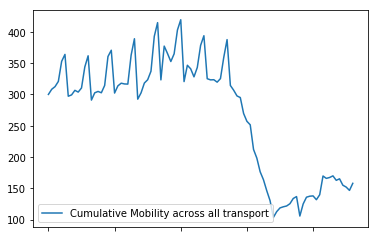

In [13]:
# Lets plot for Germany.
input_region()

    Germany has been hard hit by COVID 19. As of 21st April, there are 147,103 cases and around 5000 deaths. Due to an excellent countrywide Medical and Health 
    care system, Germany also happens to have the highest recovery rate among top hard hit countries by COVID19.
    
> Germany government had declared a nationwide curfew on 22nd of March, however strict measures on people's movements already began being taken around 10th March. The same is clearly evident from our plot. The cumulative mobility across Germany looks to be sharply falling down staring around 12th March. As of now, German government ahs started loosening the lockdown restrictions as the country marches towards, what appears to be a stability in daily cases. The same is again evident from the plot, of late in april mobility has again begun picking up.

### Now lets also work on plots for mobility across transport types

In [14]:
apple.transportation_type.value_counts()

driving    152
walking    152
transit     91
Name: transportation_type, dtype: int64

Note from above that all the 152 countries/ regions have data for `driving` and `walking` transportation type, some have `transit` type too.

In [15]:
# defining a function for plotting the transportation_type wise mobility for a given region/country

def plot_mobility_region_trans(region_country_trans):
    apple_mob_trans_wise = apple[apple.region == region_country_trans]
    apple_mob_trans_wise = apple_mob_trans_wise.drop(['region'], axis = 1)
    apple_mob_trans_wise = apple_mob_trans_wise.T

    if len(apple_mob_trans_wise.columns) < 3:
        apple_mob_trans_wise.columns = ['driving', 'walking']
    elif len(apple_mob_trans_wise.columns) == 3:
        apple_mob_trans_wise.columns = ['driving', 'walking', 'transit']
    
    apple_mob_trans_wise = apple_mob_trans_wise[1:]
    apple_mob_trans_wise.plot.line(title='Mobility Report')
    
    
# defining function to take region name input from the user.
    
def input_region_trans():
    print('Which region/country mobility report would you like to see?')
    region_name_trans = input()
    if(region_name_trans in regions):
        print('Below plotted is the mobility report for the region/country: ', region_name_trans)
        plot_mobility_region_trans(region_name_trans)
    else:
        print('Data on this country is not available')
        print('\nWanna see the mobility plots of some other region/country ? Enter `Y` or `N`')
        ques = input()
        if(ques == 'Y'):
            input_region_trans()
        else:
            print('\n\n\nCOVID-19 has spread all across the world. Many countries have adopted lockdown measures in their regions, evident from the plots you saw. Stay Home Stay Safe.')

Lets plot people's mobility for some of the countries/regions and observe how lockdown measures have impacted the region.

Which region/country mobility report would you like to see?
Detroit
Below plotted is the mobility report for the region/country:  Detroit


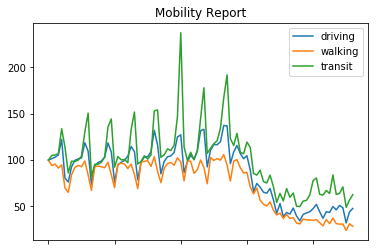

In [16]:
# Lets plot for Detroit, USA
input_region_trans()

    Detroit is best known as the center of the U.S. automobile industry, and the "Big Three" auto manufacturers General Motors, Ford, and Fiat Chrysler are all
    headquartered in Metro Detroit. This industry requires many labors who come from far off places.

> Observe there is a major spike in transit mobility around 22nd Feb. Also throughout February, there was a strong transit mobility. I suppose this high transit mobility must have been due to people taking public transport to move back to their homes (as a panick action) due to sudden strong US government measures to fight COVID 19.

> Other than transit mobility, the mobility via driving or walking are not much and start dying down March onwards.

Which region/country mobility report would you like to see?
Spain
Below plotted is the mobility report for the region/country:  Spain


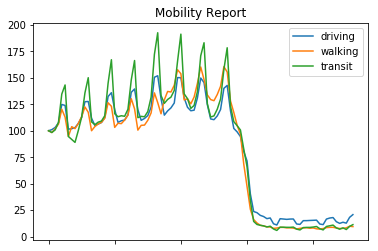

In [17]:
# Lets plot for Spain
input_region_trans()

    Spain is one among the top worst hit countries by COVID 19. As of 21st April there are 204,178 cases in Spain, and more than 20000 deaths.
    
    
>Note how the mobilty was pretty descent until a strict lockdown measures was taken by the 
Spanish Government. Note the dramatic drop around 12th March. This seems to be very much inline with the fact that Spanish Government imposed a nation wide
lockdown on 14th March.

### The mobility in India

Which region/country mobility report would you like to see?
India
Below plotted is the mobility report for the region/country:  India


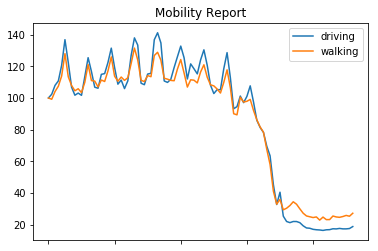

In [22]:
input_region_trans()

Above is the visualization of the mobility report in India which used to be at peak before the spread of covid-19 and now it shows a drastic change which decreased the mobility of people; This also insures that the Lockdown is taken into consideration by People.

#### dividing the dataframe : before corona(bc) and after corona(bc) in India

India reported the first confirmed case of the coronavirus infection on 30 January 2020 in the state of Kerala. The affected had a travel history from Wuhan, China.



(1, 18)


,59
2020-01-13,200.00
2020-01-14,201.53
2020-01-15,212.04
2020-01-16,218.18
2020-01-17,234.55


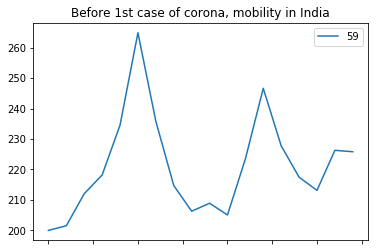

In [18]:
bc= apple_total_mob_per_day.iloc[:,0:19]
bc= bc.loc[bc['region'] == 'India']
bc=bc.iloc[:,1:19]
print(bc.shape)
bc = bc.T
bc.plot.line(title='Before 1st case of corona, mobility in India')
bc.head()



(1, 75)


,59
2020-01-31,239.54
2020-02-01,257.45
2020-02-02,233.04
2020-02-03,219.29
2020-02-04,224.55


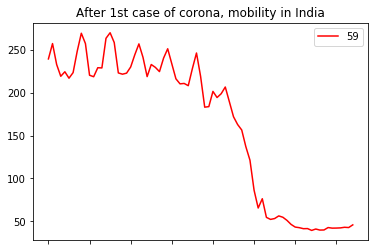

In [19]:
ac= apple_total_mob_per_day.loc[apple_total_mob_per_day['region'] == 'India']
ac= ac.iloc[:,19:]
print(ac.shape)
ac = ac.T
ac.plot.line(title='After 1st case of corona, mobility in India',color='red')
ac.head()




(75, 1)


,59
2020-03-25,52.26
2020-03-26,53.25
2020-03-27,56.33
2020-03-28,54.77
2020-03-29,51.12


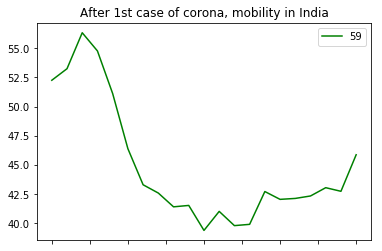

In [20]:
ld= apple_total_mob_per_day.loc[apple_total_mob_per_day['region'] == 'India']
ld= ld.iloc[:,73:]
print(ac.shape)
ld = ld.T
ld.plot.line(title='After 1st case of corona, mobility in India',color='green')
ld.head()


we can see that the lockdown in India starts from 25-03-2020. Since, there was mobility in India for few days, later on the lockdown showed its impact and hence the spread of corona virus came into control.

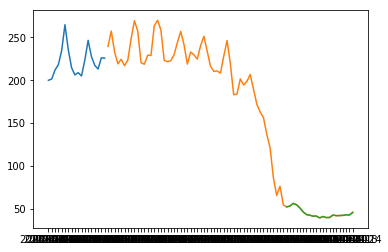

In [21]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(bc[59])
ax1.plot(ac[59])
ax1.plot(ld[59])


the above graph shows the mobility in India throughtout the period in respective before corona, after corona and the lockdown.
considering after corona as after the first case of corona patient in India

# CONCLUSION:

The data has been taken from the Apple Mobility Trends which shows the Apple mobile phone users in the world.In all the above visulization we have considered some data which represents before and after Covid-19 spread in World.we can conclude that the years and years before Covid-19 the mobility in the country was at the peak and suddenly in Year 2020 at certain point it decreases, this shows the impact of Lockdown which was taken into consideration looking ahead for thr spread of Covid-19.Lockdown as well as the virus spread varies from country to country; Atlast we have considered the country India to plot a visulaization graph of mobility throught the tenure.

Beside all other impacts of Covid-19 we can see the impact on mobility; that is the migration of people as they are stuck at the same place.


The current outbreak of COVID-19 has affected global mobility in the form of various travel disruptions, restrictions and blockages. To better understand how COVID-19 affects global mobility, the International Organization for Migration (IOM) has been working to map the impacts on human mobility, at Global, Regional and Country level. Subsequently, the IOM have initiated the following activities:
1.COVID-19 Travel Restriction Monitoring 
2.COVID-19 Country Points of Entry (PoE) Status Baseline Assessment


the predictions are divided into 7 topics:

2020 will see more travel time goals in major urban areas as a result of transportation planning efforts. The impact of COVID-19 is likely marginal here. Yet, it is possible that the transport planning process may become much more flexible than it is now and start taking into consideration situations such as natural disasters and disease outbreaks.

Autonomous vehicles (AVs) will actually be put into public transport services. Measures like the implementation of rear-door boarding, elimination of on-board payment and installation of panels next to the driver, were applied to reduce driver exposure. In this context, the deployment of AVs could be seen as a further solution to safeguard transit operators.

Higher use of artificial intelligence and deep learning in public transport. COVID-19 may accelerate the development of artificial intelligence in many different areas representing a reduction of human contact or proximity. For example, digital assistants could be used to check the temperatures of boarding travellers as well as regulate the number of passengers.

Traffic management will be recognised as a significant portion of Mobility-as-a-Service (MaaS). Even though mobility choices will be affected, COVID-19 effects on this prediction are minimal as including data from traffic management and operations should still be feasible.

Perfecting the ‘complete’ trip. Before COVID-19, there were numerous barriers to disabled, older, and low-income people attempting to make a “complete” trip. Now, the barriers are even bigger. Performing a complete trip during a pandemic may be challenging unless several solutions are improved. For example, providing real-time seating and wheelchair space availability to help to comply with physical distancing.

The proliferation of kerb management initiatives and systems. COVID-19 has already made significant changes in this area. Many cities have introduced changes to allow short-term parking and reduce parking near highly frequented areas.

2020 will continue to move toward open platforms and data to drive technology-enabled mobility services. COVID-19 can be seen as an accelerator for the development of open platforms and data. For example, incorporating social distancing into a MaaS platform would be one way of ensuring that travellers are provided with all available and safe mobility options.
    
    
